# __Conjunto de dados Scada de turbina eólica__

---

##  __Objetivo__

Explorar e analisar os dados coletados de turbinas eólicas para entender o desempenho e a eficiência da geração de energia.

### __Importando Bibliotecas__

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### __Importando DataFrame__

In [99]:
data = pd.read_csv('T1.csv')

###   __Tratamento__

In [100]:
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [101]:
#Mudança do nome das colunas
data= data.rename(columns={'Date/Time' : 'Data/Hora', 'LV ActivePower (kW)': 'Potência Gerada', 'Wind Speed (m/s)': 'Velocidade do vento (m/s)' , 'Theoretical_Power_Curve (KWh)': 'Curva_de_Potência_Teórica (KWh):', 'Wind Direction (°)': 'Direção do vento (°)'})


In [102]:
data.head()

,Data/Hora,Potência Gerada,Velocidade do vento (m/s),Curva_de_Potência_Teórica (KWh):,Direção do vento (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [103]:
#Modificando o formato Data e Hora
data['Data/Hora'] = pd.to_datetime(data['Data/Hora'], format="%d %m %Y %H:%M")

In [104]:
data['Data/Hora']

0       2018-01-01 00:00:00
1       2018-01-01 00:10:00
2       2018-01-01 00:20:00
3       2018-01-01 00:30:00
4       2018-01-01 00:40:00
                ...        
50525   2018-12-31 23:10:00
50526   2018-12-31 23:20:00
50527   2018-12-31 23:30:00
50528   2018-12-31 23:40:00
50529   2018-12-31 23:50:00
Name: Data/Hora, Length: 50530, dtype: datetime64[ns]

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Data/Hora                         50530 non-null  datetime64[ns]
 1   Potência Gerada                   50530 non-null  float64       
 2   Velocidade do vento (m/s)         50530 non-null  float64       
 3   Curva_de_Potência_Teórica (KWh):  50530 non-null  float64       
 4   Direção do vento (°)              50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [106]:
#Verificando se contêm valores nulos
data.isnull().sum()

Data/Hora                           0
Potência Gerada                     0
Velocidade do vento (m/s)           0
Curva_de_Potência_Teórica (KWh):    0
Direção do vento (°)                0
dtype: int64

In [107]:
data.columns

Index(['Data/Hora', 'Potência Gerada', 'Velocidade do vento (m/s)',
       'Curva_de_Potência_Teórica (KWh):', 'Direção do vento (°)'],
      dtype='object')

### __Processamento__


__Usamos dados da tabela de entrada como base para o grafíco de scatterplot para ver a relação da Velocidade do vento (m/s) com a Potência Gerada do ano 2018__

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Potência Gerada'>

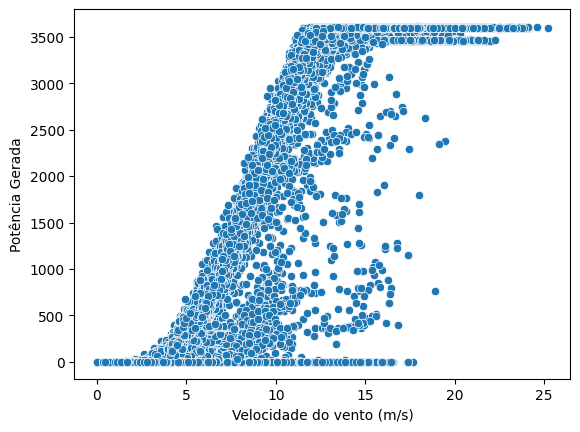

In [108]:
sns.scatterplot(data=data, x='Velocidade do vento (m/s)', y='Potência Gerada')

__Ao analizar o grafico vemos a turbina não esta produzindo a quantidade de energia que deveria estar produzindo em relação a velocidade do vento.__

<Axes: xlabel='Velocidade do vento (m/s)', ylabel='Curva_de_Potência_Teórica (KWh):'>

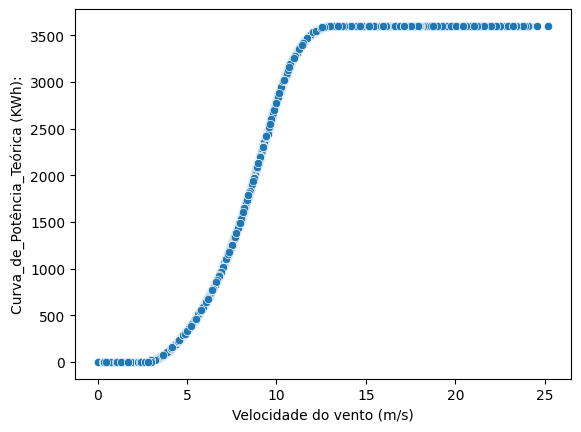

In [109]:
sns.scatterplot(data=data, x='Velocidade do vento (m/s)', y='Curva_de_Potência_Teórica (KWh):')

__Com esse grafíco podemos ver a quantidade ideal de energia que ele deveria estar produzindo__

In [110]:
data['Data/Hora'] = data['Data/Hora'].astype(str)

In [111]:
mes =  data['Data/Hora'].apply(lambda x: x.split('-')[1])
mes

0        01
1        01
2        01
3        01
4        01
         ..
50525    12
50526    12
50527    12
50528    12
50529    12
Name: Data/Hora, Length: 50530, dtype: object

In [ ]:
pot_real = data['Potência Gerada'].to_list()
pot_teorica = data['Curva_de_Potência_Teórica (KWh):'].to_list()

pot_max= []
pot_min = []
dentro_limite = []


for n in pot_teorica:
    pot_max.append(n*1.05)
    pot_min.append(n*0.95)



for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('dentro')

    elif potencia == 0:
        dentro_limite.append('zero')

    else:
        dentro_limite.append('fora')

    print(dentro_limite.count('dentro')/len(dentro_limite))
    



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.058823529411764705
0.1111111111111111
0.15789473684210525
0.2
0.23809523809523808
0.2727272727272727
0.2608695652173913
0.25
0.28
0.3076923076923077
0.3333333333333333
0.32142857142857145
0.3448275862068966
0.36666666666666664
0.3548387096774194
0.34375
0.36363636363636365
0.38235294117647056
0.4
0.3888888888888889
0.40540540540540543
0.42105263157894735
0.4358974358974359
0.45
0.4634146341463415
0.47619047619047616
0.46511627906976744
0.45454545454545453
0.4666666666666667
0.4782608695652174
0.46808510638297873
0.4583333333333333
0.46938775510204084
0.48
0.49019607843137253
0.5
0.5094339622641509
0.5185185185185185
0.5272727272727272
0.5178571428571429
0.5263157894736842
0.5344827586206896
0.5254237288135594
0.5166666666666667
0.5245901639344263
0.532258064516129
0.5238095238095238
0.53125
0.5384615384615384
0.5303030303030303
0.5373134328358209
0.5441176470588235
0.5362318840579711
0.5285714285714286
0.5352112676056338

In [ ]:
data['Dentro limite'] = dentro_limite

In [ ]:
data

,Data/Hora,Potência Gerada,Velocidade do vento (m/s),Curva_de_Potência_Teórica (KWh):,Direção do vento (°),Dentro limite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,fora
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,dentro


In [ ]:
data['Dentro limite'].unique()

array(['fora', 'dentro', 'zero'], dtype=object)

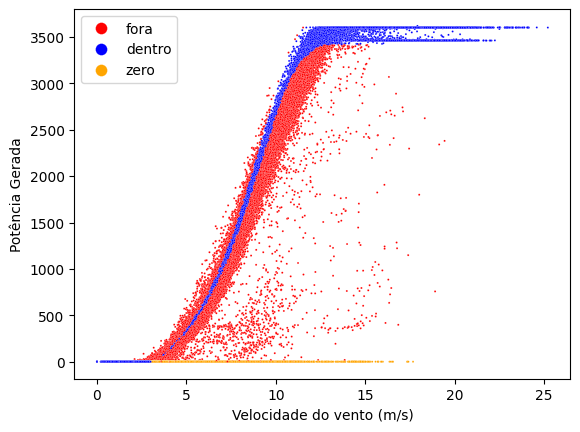

In [ ]:
cores = {'dentro': 'blue', 'fora': 'red','zero': 'orange'}
sns.scatterplot(data=data, x='Velocidade do vento (m/s)', y='Potência Gerada',hue= 'Dentro limite',s=2, palette= cores)
plt.legend(markerscale = 6)

In [121]:
data['Data/Hora'] = pd.to_datetime(data['Data/Hora'])

In [122]:
data['mess'] = data['Data/Hora'].dt.month


In [125]:
jan = data[data["mes"] == 1]   # Filtra dados de janeiro
fev = data[data["mes"] == 2] # Filtra dados de fevereiro
mar = data[data["mes"] == 3]
abr = data[data["mes"] == 4]
mai = data[data["mes"] == 5]
jun = data[data["mes"] == 6]
ful = data[data["mes"] == 7]
ago = data[data["mes"] == 8]
set = data[data["mes"] == 9]
out = data[data["mes"] == 10]
nov = data[data["mes"] == 11]
dez = data[data["mes"] == 12] # Filtra dados de dezembro


KeyError: 'mes'